In [1]:
import tensorflow as tf

# Loading-"MNIST Data Set"
# Containing Training Samples=60,000 ,Testing Samples=10,000
# TensorFlow already contain MNSIT data set which cn be loaded using Keras

In [2]:
mnist=tf.keras.datasets.mnist

# After loading the MNSIT data, Divide into train and Test datasets

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

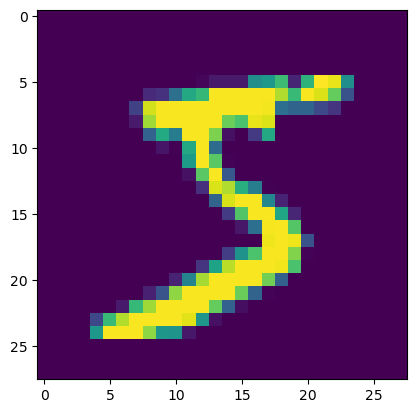

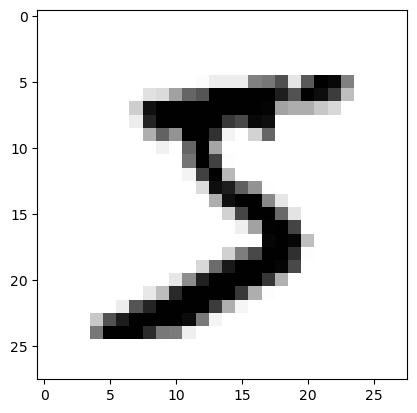

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0]) 
plt.show() ## in order to execute the graph
##however we dont know whether its color image or binary images
## so inorder to plot it change the configuration
plt.imshow(x_train[0], cmap=plt.cm.binary)

# Checking the values of each pixel
## Before Normalization

In [6]:
print(x_train[0])## before Normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## As images are in Gray level (1 channel==>0 to 255), not colored(RGB)
# Normalizing the data | Pre-Processing Step

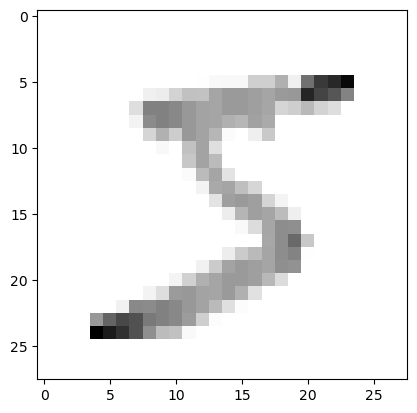

In [7]:
## you might have noticed that , its gray image and all values varies from 0 to 255
## in order to normalize it
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

# After Normalization

In [8]:
print(x_train[0])## you can see all values are now normalized

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0])## just to check that we have tables inside our netwrok

5


# Resizing image to make it suitable for apply Convolution operation

In [10]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)## increasing one dimension for kernel operation
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)## increasing one dimesnion for kernal operation
print("Training Samples dimension",x_trainr.shape)
print("Testing Samples dimension",x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


# Crating a Deep Neural Network
### Training on 60,000 samples of  MNIST handwritten dataset

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [12]:
## creating a neural network now
model=Sequential()

### First Covolution layer 0 1 2  3 (60000,28,28,1) 28+1-3=26 * 26
model.add(Conv2D(64,(3,3), input_shape=x_trainr.shape[1:]))## only for first convolution layer to mention input layer size
model.add(Activation("relu"))## activation function to make it non-linear, <0 remove, >0
model.add(MaxPooling2D(pool_size=(2,2)))# MaxPooling single maximum value of 2x2

### Second Convolution Layer 
model.add(Conv2D(64,(3,3)))# 2nd Convolution Layer
model.add(Activation("relu")) #activation function
model.add(MaxPooling2D(pool_size=(2,2)))#MaxPooling

### 3rd Convolution Layer 
model.add(Conv2D(64,(3,3)))# 2nd Convolution Layer
model.add(Activation("relu")) #activation function
model.add(MaxPooling2D(pool_size=(2,2)))#MaxPooling

### Fully Connected Layer # 1 20*20=400
model.add(Flatten())### before using fully connected Layer, nedd to be flatten so that 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))


### Fully Connected Layer #2
model.add(Dense(32))
model.add(Activation("relu"))

## Last Fully Connected Layer, output must be equal to number of classes, 10(0-9)
model.add(Dense(10))## this Last dense Layer must be equal to 10
model.add(Activation("softmax")) #activation function is chaged to Softmax(class Probabilities)


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [14]:
print("Total training Samples= ",len(x_trainr))

Total training Samples=  60000


In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

In [16]:
model.fit(x_train,y_train,epochs=5,validation_split=0.3)##Training Step

Epoch 1/5


1313/1313 [==============================] - 26s 18ms/step - loss: 0.3344 - accuracy: 0.8953 - val_loss: 0.1219 - val_accuracy: 0.9641
Epoch 2/5
1313/1313 [==============================] - 23s 17ms/step - loss: 0.1064 - accuracy: 0.9679 - val_loss: 0.0965 - val_accuracy: 0.9706
Epoch 3/5
1313/1313 [==============================] - 23s 18ms/step - loss: 0.0744 - accuracy: 0.9776 - val_loss: 0.0942 - val_accuracy: 0.9731
Epoch 4/5
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0585 - accuracy: 0.9817 - val_loss: 0.0654 - val_accuracy: 0.9807
Epoch 5/5
1313/1313 [==============================] - 23s 18ms/step - loss: 0.0465 - accuracy: 0.9853 - val_loss: 0.0638 - val_accuracy: 0.9807


In [17]:
## Evaulating on testing data set MNIT
test_loss, test_acc=model.evaluate(x_test,y_test)
print("Test Loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0601 - accuracy: 0.9826
Test Loss on 10,000 test samples 0.060069818049669266
Validation Accuracy on 10,000 test samples 0.9825999736785889


In [18]:
# predictions= new_model.predict([x_test]) ## there is specialized method for efficeintyly saving your model, to na,e all input 
### therefore instead of using new model loaded , for now only for predictions i am using simple model

predictions=model.predict([x_testr])

313/313 [==============================] - 2s 7ms/step


In [19]:
print(predictions)## actually these predictions are based on one hot encodeing so these are only arrays, containing softmax probabilites 

[[4.07056660e-07 3.62264950e-06 1.31516781e-05 ... 9.99956250e-01
  4.32795666e-08 2.09629798e-05]
 [8.02804891e-07 2.41351017e-07 9.99995470e-01 ... 1.98981411e-07
  9.45019707e-08 2.02076276e-08]
 [1.08777904e-05 9.99700308e-01 3.82637381e-06 ... 5.27298034e-05
  4.22977473e-06 1.19580964e-05]
 ...
 [1.76567468e-07 3.98920932e-08 6.98180624e-09 ... 4.98399800e-07
  1.29617786e-06 1.79817580e-05]
 [6.29042688e-06 3.16229543e-10 9.10537494e-08 ... 1.77805093e-09
  7.77999667e-05 4.57121217e-07]
 [2.38782814e-05 1.29656419e-09 2.94227084e-05 ... 1.19553185e-08
  1.39633876e-05 4.03956756e-06]]


In [20]:
## in order to understand, convert the predictions from one hot encodeing, we need to use numpy for that
print(np.argmax(predictions[0]))## so actually argmax will return the maximum value index and find the value of it

7


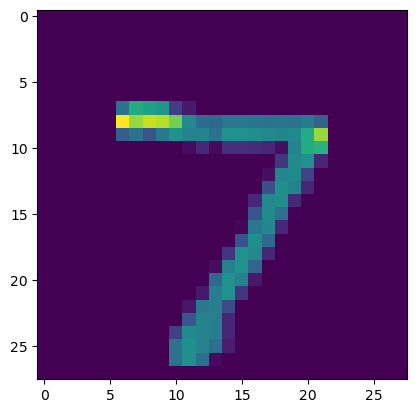

In [21]:
## now to check that is our answer is true or not
plt.imshow(x_test[0])

In [22]:
## in order to understand, convert the predictions from one hot encodeing, we need to use numpy for that
print(np.argmax(predictions[50]))## so actually argmax will return the maximum value index and find the value of it

6


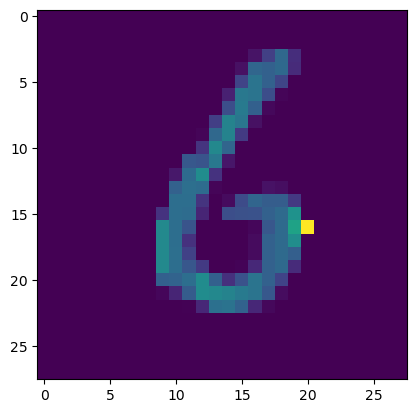

In [23]:
## now to check that is our answer is true or not
plt.imshow(x_test[50])

In [24]:
import cv2

In [25]:
img=cv2.imread("ninepng.png")

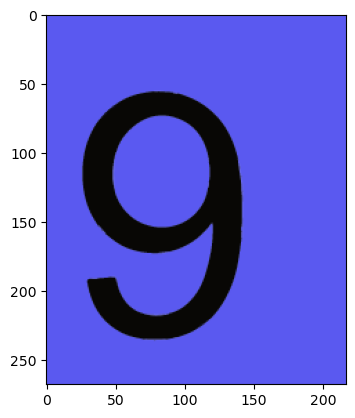

In [26]:
plt.imshow(img)

In [27]:
img.shape

(268, 217, 3)

In [28]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [29]:
gray.shape

(268, 217)

In [30]:
resized=cv2.resize(gray,(28,28),interpolation =cv2.INTER_AREA)

In [31]:
resized.shape

(28, 28)

In [32]:
newing=tf.keras.utils.normalize(resized,axis=1)## 0 to 1 scaling

In [33]:
newing=np.array(newing).reshape(-1,IMG_SIZE,IMG_SIZE,1)## kernel operation of convolution layer,

In [34]:
newing.shape

(1, 28, 28, 1)

In [35]:
predictions=model.predict(newing)

1/1 [==============================] - 0s 153ms/step


In [36]:
print(np.argmax(predictions))

9


In [37]:
import numpy as np
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN


cap = cv2.VideoCapture("bandicam 2024-03-03 12-42-03-432.mp4")
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open camera")

text = "Some text in a box!"
# get width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))

cntr = 0
while True:
    ret, frame = cap.read()
    cntr = cntr + 1
    if (cntr % 2) == 0:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
        newing = tf.keras.utils.normalize(resized, axis=1)
        newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
        predictions = model.predict(newing)
        status = np.argmax(predictions)

        print(status)
        print(type(status))

        x1, y1, w1, h1 = 0, 0, 175, 75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        # Add text
        cv2.putText(frame, str(status), (x1 + int(w1 / 5), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255),
                    2)

        # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Print(faceCascade.empty())
        # faces = faceCascade.detectMultiScale(gray, 1.1, 4)

        # Draw a rectangle around the faces
        # for(x, y, w, h) in faces:
        # cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # use putText() method for
        # inserting text on video

        cv2.imshow('handwritten Digits Recognition Tutorial', frame)

        if cv2.waitKey(2) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 38ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 42ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 48ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 50ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 46ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 44ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 43ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 43ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 43ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 47ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 43ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 42ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 53ms/step
5
<class 'numpy.int64'>
1/1 [=======

1/1 [==============================] - 0s 48ms/step
6
<class 'numpy.int64'>
1/1 [==============================] - 0s 47ms/step
6
<class 'numpy.int64'>
1/1 [==============================] - 0s 49ms/step
6
<class 'numpy.int64'>
1/1 [==============================] - 0s 44ms/step
6
<class 'numpy.int64'>
1/1 [==============================] - 0s 46ms/step
6
<class 'numpy.int64'>
1/1 [==============================] - 0s 42ms/step
6
<class 'numpy.int64'>
1/1 [==============================] - 0s 51ms/step
6
<class 'numpy.int64'>
1/1 [==============================] - 0s 46ms/step
6
<class 'numpy.int64'>
1/1 [==============================] - 0s 45ms/step
6
<class 'numpy.int64'>
1/1 [==============================] - 0s 43ms/step
6
<class 'numpy.int64'>
1/1 [==============================] - 0s 43ms/step
6
<class 'numpy.int64'>
1/1 [==============================] - 0s 39ms/step
6
<class 'numpy.int64'>
1/1 [==============================] - 0s 48ms/step
6
<class 'numpy.int64'>
1/1 [=======

1/1 [==============================] - 0s 43ms/step
7
<class 'numpy.int64'>
1/1 [==============================] - 0s 42ms/step
7
<class 'numpy.int64'>
1/1 [==============================] - 0s 41ms/step
7
<class 'numpy.int64'>
1/1 [==============================] - 0s 41ms/step
7
<class 'numpy.int64'>
1/1 [==============================] - 0s 43ms/step
7
<class 'numpy.int64'>
1/1 [==============================] - 0s 44ms/step
7
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
7
<class 'numpy.int64'>
1/1 [==============================] - 0s 44ms/step
7
<class 'numpy.int64'>
1/1 [==============================] - 0s 43ms/step
7
<class 'numpy.int64'>
1/1 [==============================] - 0s 36ms/step
7
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
7
<class 'numpy.int64'>
1/1 [==============================] - 0s 44ms/step
7
<class 'numpy.int64'>
1/1 [==============================] - 0s 45ms/step
7
<class 'numpy.int64'>
1/1 [=======

1/1 [==============================] - 0s 39ms/step
9
<class 'numpy.int64'>
1/1 [==============================] - 0s 36ms/step
9
<class 'numpy.int64'>
1/1 [==============================] - 0s 44ms/step
9
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
9
<class 'numpy.int64'>
1/1 [==============================] - 0s 48ms/step
9
<class 'numpy.int64'>
1/1 [==============================] - 0s 46ms/step
9
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
9
<class 'numpy.int64'>
1/1 [==============================] - 0s 37ms/step
9
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
9
<class 'numpy.int64'>
1/1 [==============================] - 0s 39ms/step
9
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
9
<class 'numpy.int64'>
1/1 [==============================] - 0s 26ms/step
9
<class 'numpy.int64'>
1/1 [==============================] - 0s 46ms/step
9
<class 'numpy.int64'>
1/1 [=======

1/1 [==============================] - 0s 43ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 44ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 45ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 42ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 42ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 41ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 38ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 39ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 48ms/step
2
<class 'numpy.int64'>
1/1 [==============================] - 0s 36ms/step
2
<class 'numpy.int64'>
1/1 [=======

1/1 [==============================] - 0s 39ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 41ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 39ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 46ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 36ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 42ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 36ms/step
3
<class 'numpy.int64'>
1/1 [=======

1/1 [==============================] - 0s 40ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 43ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 41ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 46ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 33ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 39ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 41ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 39ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 43ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 44ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 38ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 49ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 38ms/step
1
<class 'numpy.int64'>
1/1 [=======

In [38]:
import cv2
import numpy as np
import tensorflow as tf

font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open camera")

while True:
    ret, frame = cap.read()

    if not ret:
        print("Failed to capture frame. Exiting...")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
    newing = tf.keras.utils.normalize(resized, axis=1)
    newing = np.array(newing).reshape(-1, 28, 28, 1)  # Assuming IMG_SIZE is 28
    predictions = model.predict(newing)
    status = np.argmax(predictions)

    print(status)
    print(type(status))

    x1, y1, w1, h1 = 0, 0, 175, 75
    # Draw black background rectangle
    cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
    # Add text
    cv2.putText(frame, str(status), (x1 + int(w1 / 5), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255),
                2)

    cv2.imshow('handwritten Digits Recognition Tutorial', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 40ms/step
0
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 44ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 44ms/step
0
<class 'numpy.int64'>
1/1 [==============================] - 0s 39ms/step
0
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 38ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 47ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 43ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 41ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 37ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 44ms/step
8
<class 'numpy.int64'>
1/1 [=======

1/1 [==============================] - 0s 38ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 39ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 39ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 36ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 38ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 37ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 38ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 39ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 38ms/step
8
<class 'numpy.int64'>
1/1 [=======

1/1 [==============================] - 0s 39ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 47ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 39ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 37ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 37ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 44ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 43ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 39ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 39ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 37ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 37ms/step
8
<class 'numpy.int64'>
1/1 [=======

1/1 [==============================] - 0s 39ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 39ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 38ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 39ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 37ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 38ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 41ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 42ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 42ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 40ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 42ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 41ms/step
8
<class 'numpy.int64'>
1/1 [=======

1/1 [==============================] - 0s 38ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 38ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 38ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 38ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 42ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 48ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 38ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 39ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 43ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 42ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 41ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 57ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 55ms/step
8
<class 'numpy.int64'>
1/1 [=======